In [47]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
norm = stats.norm

In [3]:
def se_to_sd(se):
    """
    Converts Standard Error to Standard deviation.
    Parameters:
        se (float, required): The standard error of the data to be generated.
    Returns:
        float: A float value for the standard deviation.
    """
    sd = se*np.sqrt(size)
    return sd

In [4]:
def ci_to_sd(lowerCI,upperCI,CIval=95,size=100):
    """
    Converts Confidence interval to Mean and Standard deviation.
    Parameters:
        lowerCI (float, required): The lower bound of the confidence interval.
        upperCI (float, required): The upper bound of the confidence interval.
        CIval (float, optional): The confidence level. 
            It must be one of the following values.
            [99.9,99.5,99.0,95.0,90.0,85.0,80.0]
            The default value is 95 for 95% confidence interval.
        size (int, optional): The size of the sample to be generated. 
            The default value is 100.
    Returns:
        float: A float value for Mean.
        float: A float value for Standard deviation.
    """
    Zvals = {99.9:3.291,99.5:2.807,99.0:2.807,95.0:1.960,90.0:1.645,85.0:1.645,80.0:1.282}
    z = Zvals[float(CIval)]
    mean = (lowerCI+upperCI)/2
    sd = (upperCI-lowerCI)/2/z*np.sqrt(size)
    return mean, sd

In [5]:
#def datagen(mean,sd,size=100):
 #   """
 #   Generates random standard distribution data from mean and standard deviation.
 #   Parameters:
 #       mean(float, required): The mean of the data to be generated.
 #       sd (float, required): The standard deviation of the data to be generated.
 #       size (int, optional): The size of the sample to be generated. 
 #           The default value is 100.
 #   Returns:
 #       numpy.ndarray: A numpy array with random standard distribution data.
 #   """
 #   randdata = np.random.normal(mean,sd, size)
 #   return randdata

In [6]:
def datagen(mean=None,sd=None,se=None,upperCI=None,lowerCI=None,CIval=95.0,size=100):
    """
    Generates random standard distribution data from mean and standard deviation.
    Parameters:
        mean(float, optional): The mean of the data to be generated.
        sd (float, optional): The standard deviation of the data to be generated.
        se (float, optional): The standard error of the data to be generated.
        lowerCI (float, required): The lower bound of the confidence interval.
        upperCI (float, required): The upper bound of the confidence interval.
        CIval (float, optional): The confidence level. 
            It must be one of the following values.
            [99.9,99.5,99.0,95.0,90.0,85.0,80.0]
            The default value is 95 for 95% confidence interval.
        size (int, optional): The size of the sample to be generated. 
            The default value is 100.
    Returns:
        numpy.ndarray: A numpy array with random standard distribution data.
    """
    if type(upperCI)==float:
        ci_to_sd(lowerCI,upperCI,CIval=95,size=100)
    if type(se)==float:
        sd = se*np.sqrt(size)
    randdata = np.random.normal(mean,sd,size)
    return randdata

In [7]:
def correctdatatype(mean=None,sd=None,se=None,upperCI=None,lowerCI=None):
    """
    Generates random standard distribution data from mean and standard deviation.
    Parameters:
        mean(int, optional): The mean.
        sd (int, optional): The standard deviation of the data to be generated.
        se (int, optional): The standard error of the data to be generated.
        lowerCI (int, required): The lower bound of the confidence interval.
        upperCI (int, required): The upper bound of the confidence interval.
    Returns:
        float: A float value for mean.
        float: A float value for sd.
        float: A float value for se.
        float: A float value for lowerCI.
        float: A float value for upperCI.
    """    
    if type(mean)==int:
        fmean = float(mean)
    else:
        fmean = mean
    if type(sd)==int:
        fsd = float(sd)
    else:
        fsd = sd
    if type(se)==int:
        fmean = float(fse)
    else: 
        fse = se
    if type(upperCI)==int:
        fuCI = float(upperCI)
    else:
        fuCI = upperCI
    if type(lowerCI)==int:
        flCI = float(lowerCI)
    else:
        flCI = lowerCI
    return fmean,fsd,fse,fuCI,flCI

In [115]:
def compounddata(mean1=None,sd1=None,se1=None,upperCI1=None,lowerCI1=None,CIval1=95.0,
            mean2=None,sd2=None,se2=None,upperCI2=None,lowerCI2=None,CIval2=95.0,
            mean3=None,sd3=None,se3=None,upperCI3=None,lowerCI3=None,CIval3=95.0,
               size=1000):
    """
    A partial wrapper function to generate three datasets of similar attributes.
    Parameters:
        mean1(int/float, optional): The mean.
        sd1 (int/float, optional): The standard deviation of the data to be generated.
        se1 (int/float, optional): The standard error of the data to be generated.
        lowerCI1 (int/float, optional): The lower bound of the confidence interval.
        upperCI1 (int/float, optional): The upper bound of the confidence interval.
        CIval1 (float, optional): The upper bound of the confidence interval.
        
    Returns:
        numpy.ndarray: A numpy array with random standard distribution data.
        numpy.ndarray: A numpy array with random standard distribution data.
        numpy.ndarray: A numpy array with random standard distribution data.
    """  
    flmean1,flsd1,flse1,flupperCI1,fllowerCI1 = correctdatatype(mean1,sd1,se1,upperCI1,lowerCI1)
    flmean2,flsd2,flse2,flupperCI2,fllowerCI2 = correctdatatype(mean2,sd2,se2,upperCI2,lowerCI2)
    flmean3,flsd3,flse3,flupperCI3,fllowerCI3 = correctdatatype(mean3,sd3,se3,upperCI3,lowerCI3)
    
    datagenerated1 = datagen(mean=flmean1,sd=flsd1,se=flse1,upperCI=flupperCI1,lowerCI=fllowerCI1,CIval=CIval1,size=size)
    datagenerated2 = datagen(mean=flmean2,sd=flsd2,se=flse2,upperCI=flupperCI2,lowerCI=fllowerCI2,CIval=CIval2,size=size)
    datagenerated3 = datagen(mean=flmean3,sd=flsd3,se=flse3,upperCI=flupperCI3,lowerCI=fllowerCI3,CIval=CIval3,size=size)
    
    return datagenerated1, datagenerated2, datagenerated3

In [106]:
datagenerated1, datagenerated2, datagenerated3 = compounddata(mean1=1000,sd1=20,mean2=1020,sd2=20,mean3=1000,sd3=45,size=10000)

In [114]:
type(datagenerated1)

numpy.ndarray

In [120]:
def databinning(datagenerated1, datagenerated2, datagenerated3, bins_list):
    """
    A function to create 3 histogram bins.
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        numpy.ndarray: The values of first histograms.
        numpy.ndarray: The values of second histograms.
        numpy.ndarray: The values of third histograms.
    """  
    y1,edge1 = np.histogram(a=datagenerated1, bins=bins_list)
    y2,edge2 = np.histogram(a=datagenerated2, bins=bins_list)
    y3,edge3 = np.histogram(a=datagenerated3, bins=bins_list)
    
    return y1, y2, y3

In [121]:
bins = np.linspace(800,1150,num=50)
y1, y2, y3 = databinning(datagenerated1, datagenerated2, datagenerated3,bins_list=bins)

In [122]:
y1, y2, y3

(array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    2,    8,   16,   43,  112,
         237,  406,  612,  978, 1128, 1366, 1409, 1255,  988,  671,  382,
         204,  119,   37,   21,    6,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0]),
 array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    1,    0,   11,
          21,   53,  123,  258,  446,  719,  989, 1256, 1364, 1389, 1189,
         921,  579,  381,  180,   83,   28,    6,    1,    2,    0,    0,
           0,    0,    0,    0,    0]),
 array([  0,   0,   0,   0,   0,   1,   1,   1,   6,   6,   6,  22,  35,
         48,  69, 103, 117, 179, 191, 250, 335, 390, 432, 520, 550, 628,
        590, 605, 591, 615, 582, 587, 486, 418, 368, 295, 237, 192, 147,
        108,  88,  69,  40,  40,  15,  13,   6,   8,   6]))

In [123]:
def histplotting(datagenerated1, datagenerated2, datagenerated3, bins_list=None):
    """
    A function to plot 3 overlapping histograms
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        None.
    """ 
    a4_dims = (12, 9)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.distplot(ax=ax,a=datagenerated1,bins=bins_list,color='blue')
    sns.distplot(ax=ax,a=datagenerated2,bins=bins_list,color='green')
    sns.distplot(ax=ax,a=datagenerated3,bins=bins_list,color='red')
    return None

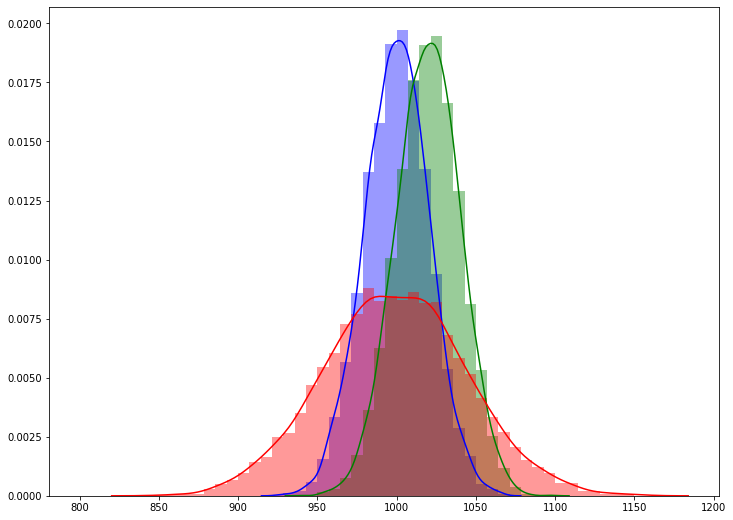

In [124]:
bins = np.linspace(800,1150,num=50)
histplotting(datagenerated1, datagenerated2, datagenerated3, bins_list=bins)

In [128]:
def overlap(y1, y2, y3):
    """
    A function to estimate the percentage of overlap between multiple histograms.
    Parameters:
        y1 (numpy.ndarray, required): The values of first histograms.
        y2 (numpy.ndarray, required): The values of second histograms.
        y3 (numpy.ndarray, required): The values of third histograms.
    Returns:
        numpy.float64: A float value showing the percentage overlap between 1st and 2nd histogram.
        numpy.float64: A float value showing the percentage overlap between 1st and 3rd histogram.
        numpy.float64: A float value showing the percentage overlap between 2nd and 3rd histogram.
    """ 
    overlap12 = np.minimum(y1, y2)
    overlap_12_perc = np.sum(overlap12)/np.sum(y1)*100
    overlap13 = np.minimum(y1, y3)
    overlap_13_perc = np.sum(overlap13)/np.sum(y1)*100
    overlap23 = np.minimum(y2, y3)
    overlap_23_perc = np.sum(overlap23)/np.sum(y2)*100
    return overlap_12_perc, overlap_13_perc, overlap_23_perc

In [129]:
overlap(y1, y2, y3)

(63.04, 63.41, 57.599999999999994)

In [168]:
def violinplotting(datagenerated1, datagenerated2, datagenerated3, bins_list=None):
    """
    A function to plot 3 overlapping histograms
    Parameters:
        datagenerated1 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated2 (numpy.ndarray, required): A numpy array with random standard distribution data.
        datagenerated3 (numpy.ndarray, required): A numpy array with random standard distribution data.
        bins_list(numpy.ndarray, required): A numpy array listing the edges of the bins.
    Returns:
        None.
    """ 
    a4_dims = (12, 9)
    fig, ax = plt.subplots(1,3,figsize=a4_dims)
    
    ax[0,0] = sns.violinplot(data=datagenerated1, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75)

    ax[0,1] = sns.violinplot(data=datagenerated2, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75)
    
    ax[0,2] = sns.violinplot(data=datagenerated3, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75)
    

    return None

IndexError: too many indices for array

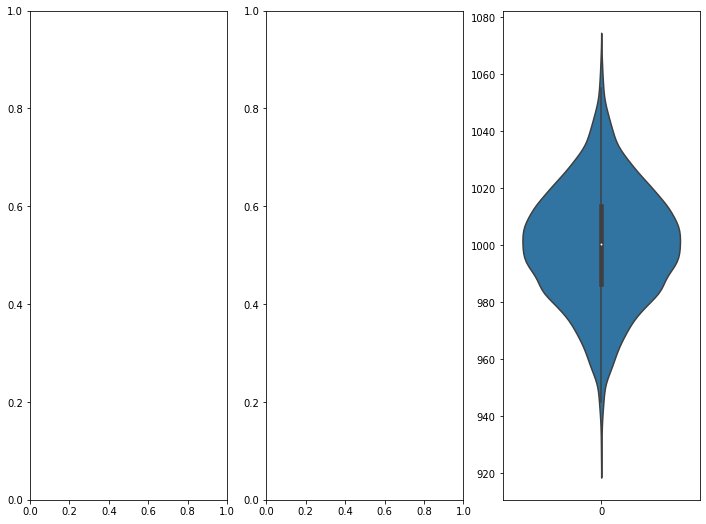

In [169]:
violinplotting(datagenerated1, datagenerated2, datagenerated3)